In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from keras.models import Model, Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Input, Dense, Dropout, Attention, BatchNormalization, Embedding, Flatten, Concatenate
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cd gdrive/MyDrive/Datasets; mkdir deneme

In [ ]:
!ls

gdrive	sample_data


# Load Data

In [ ]:


df_train = pd.read_csv('/content/gdrive/My Drive/Datasets/space_ship/train.csv')
df_test = pd.read_csv('/content/gdrive/My Drive/Datasets/space_ship/test.csv')

In [ ]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# Impute Missing Data

In [ ]:


numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['Name', 'PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP']

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer( strategy = 'constant', fill_value = 'missing')

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_imputer, numeric_features),
        ('categorical', categorical_imputer, categorical_features)
    ]
)


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_train_X = df_train.drop('Transported', axis=1)
df_train_y = df_train['Transported']


In [ ]:
df_train_X_imputed = pipeline.fit_transform(df_train_X)
df_test_imputed = pipeline.transform(df_test)

df_train_X_imputed = pd.DataFrame(df_train_X_imputed, columns=numeric_features + categorical_features)
df_test_imputed = pd.DataFrame(df_test_imputed, columns=numeric_features + categorical_features)

print(df_train_X_imputed.head())

df_train_X_imputed.info()

len(df_test) == len(df_test_imputed)


    Age RoomService FoodCourt ShoppingMall     Spa VRDeck               Name  \
0  39.0         0.0       0.0          0.0     0.0    0.0    Maham Ofracculy   
1  24.0       109.0       9.0         25.0   549.0   44.0       Juanna Vines   
2  58.0        43.0    3576.0          0.0  6715.0   49.0      Altark Susent   
3  33.0         0.0    1283.0        371.0  3329.0  193.0       Solam Susent   
4  16.0       303.0      70.0        151.0   565.0    2.0  Willy Santantines   

  PassengerId HomePlanet CryoSleep  Cabin  Destination    VIP  
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  False  
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  False  
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e   True  
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  False  
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null 

# Write imputed data

In [ ]:
df_train_X_imputed.to_csv('/content/gdrive/My Drive/Datasets/space_ship/df_train_X_imputed.csv', index=False)
df_train_y.to_csv('/content/gdrive/My Drive/Datasets/space_ship/df_train_y.csv',index=False)
df_test_imputed.to_csv('/content/gdrive/My Drive/Datasets/space_ship/df_test_imputed.csv',index=False)

# Read imputed data

In [ ]:
df_train_X_imputed = pd.read_csv('/content/gdrive/My Drive/Datasets/space_ship/df_train_X_imputed.csv')
df_train_y = pd.read_csv('/content/gdrive/My Drive/Datasets/space_ship/df_train_y.csv')
df_test_imputed = pd.read_csv('/content/gdrive/My Drive/Datasets/space_ship/df_test_imputed.csv')

# Transformations 1

In [ ]:
df_train_X_imputed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False
1,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False
4,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False


In [ ]:
df_train_X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8693 non-null   float64
 1   RoomService   8693 non-null   float64
 2   FoodCourt     8693 non-null   float64
 3   ShoppingMall  8693 non-null   float64
 4   Spa           8693 non-null   float64
 5   VRDeck        8693 non-null   float64
 6   Name          8693 non-null   object 
 7   PassengerId   8693 non-null   object 
 8   HomePlanet    8693 non-null   object 
 9   CryoSleep     8693 non-null   object 
 10  Cabin         8693 non-null   object 
 11  Destination   8693 non-null   object 
 12  VIP           8693 non-null   object 
dtypes: float64(6), object(7)
memory usage: 883.0+ KB


In [ ]:
df_train_X_imputed.drop(['Name', 'PassengerId'], axis=1, inplace = True)
df_test_imputed.drop(['Name', 'PassengerId'], axis=1, inplace = True)

df_train_X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8693 non-null   float64
 1   RoomService   8693 non-null   float64
 2   FoodCourt     8693 non-null   float64
 3   ShoppingMall  8693 non-null   float64
 4   Spa           8693 non-null   float64
 5   VRDeck        8693 non-null   float64
 6   HomePlanet    8693 non-null   object 
 7   CryoSleep     8693 non-null   object 
 8   Cabin         8693 non-null   object 
 9   Destination   8693 non-null   object 
 10  VIP           8693 non-null   object 
dtypes: float64(6), object(5)
memory usage: 747.2+ KB


In [ ]:
def split_cabin(x):
  if len(str(x).split('/')) == 3:
    return str(x).split('/')
  else:
    return ['missing', 'missing' , 'missing']

In [ ]:
def handle_cabin(df):
  df['TempCabin'] = df['Cabin'].apply(lambda x : split_cabin(x))
  df['Deck'] = df['TempCabin'].apply(lambda x : list(x)[0])
  df['Side'] = df['TempCabin'].apply(lambda x : list(x)[2])
  df.drop('TempCabin', axis=1, inplace=True)
  df.drop('Cabin', axis=1, inplace=True)

In [ ]:
handle_cabin(df_train_X_imputed)
handle_cabin(df_test_imputed)

In [ ]:
df_train_X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8693 non-null   float64
 1   RoomService   8693 non-null   float64
 2   FoodCourt     8693 non-null   float64
 3   ShoppingMall  8693 non-null   float64
 4   Spa           8693 non-null   float64
 5   VRDeck        8693 non-null   float64
 6   HomePlanet    8693 non-null   object 
 7   CryoSleep     8693 non-null   object 
 8   Destination   8693 non-null   object 
 9   VIP           8693 non-null   object 
 10  Deck          8693 non-null   object 
 11  Side          8693 non-null   object 
dtypes: float64(6), object(6)
memory usage: 815.1+ KB


In [ ]:
df_train_X_imputed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,39.0,0.0,0.0,0.0,0.0,0.0,Europa,False,TRAPPIST-1e,False,B,P
1,24.0,109.0,9.0,25.0,549.0,44.0,Earth,False,TRAPPIST-1e,False,F,S
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,False,TRAPPIST-1e,True,A,S
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,False,TRAPPIST-1e,False,A,S
4,16.0,303.0,70.0,151.0,565.0,2.0,Earth,False,TRAPPIST-1e,False,F,S


# Write Transformed Data

In [ ]:
df_train_X_imputed.to_csv('/content/gdrive/My Drive/Datasets/space_ship/df_train_X_transformed_1.csv', index=False)
df_test_imputed.to_csv('/content/gdrive/My Drive/Datasets/space_ship/df_test_transformed_1.csv',index=False)

# Read Transformed Data

In [ ]:
import pandas as pd

df_train_X_transformed_1 = pd.read_csv('/content/gdrive/My Drive/Datasets/space_ship/df_train_X_transformed_1.csv')
df_train_y = pd.read_csv('/content/gdrive/My Drive/Datasets/space_ship/df_train_y.csv')
df_test_transformed_1 = pd.read_csv('/content/gdrive/My Drive/Datasets/space_ship/df_test_transformed_1.csv')

# Deneme

In [ ]:
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'CryoSleep','Destination','VIP','Deck', 'Side']

X_train, X_test, y_train, y_test = train_test_split(
   df_train_X_transformed_1, df_train_y , test_size=0.2, random_state=42
)

X_train_num = X_train[numerical_features]
X_train_cat = X_train[categorical_features]

X_test_num = X_test[numerical_features]
X_test_cat = X_test[categorical_features]

df_test_num = df_test_transformed_1[numerical_features]
df_test_cat = df_test_transformed_1[categorical_features]

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

y_train = y_train[:,1]
y_test = y_test[:,1]
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train
y_test = label_encoder.transform(y_test)

In [ ]:



num_data = X_train_num.to_numpy()
cat_data = X_train_cat.to_numpy()

t_num_data = X_test_num.to_numpy()
t_cat_data = X_test_cat.to_numpy()

df_test_num = df_test_num.to_numpy()
df_test_cat = df_test_cat.to_numpy()



scaler = StandardScaler()
num_data = scaler.fit_transform(num_data)
df_test_num = scaler.transform(df_test_num)
t_num_data = scaler.transform(t_num_data)

print(cat_data[:5])
print(num_data[:5])

[['Earth' 'False' 'TRAPPIST-1e' 'False' 'missing' 'missing']
 ['Earth' 'False' 'TRAPPIST-1e' 'False' 'F' 'P']
 ['Europa' 'True' '55 Cancri e' 'False' 'C' 'S']
 ['Mars' 'False' 'TRAPPIST-1e' 'False' 'F' 'P']
 ['Europa' 'True' '55 Cancri e' 'False' 'C' 'P']]
[[-0.05794566 -0.333264   -0.25773351 -0.28924819  0.30744539 -0.26274904]
 [-0.82767203 -0.333264    0.4736217  -0.23814341 -0.28505687 -0.26274904]
 [-0.05794566 -0.333264   -0.29301819 -0.28924819 -0.28505687 -0.26274904]
 [-0.61774665  0.00273796 -0.29173511  0.18718024  0.59647088 -0.26274904]
 [ 0.50185534 -0.333264   -0.29301819 -0.28924819 -0.28505687 -0.26274904]]


In [ ]:
print(cat_data)


cat_data_new = []

for l in df_test_cat:
  cat_tok = []
  for w in l:
      cat_tok.append(w.replace(' ','A').replace('-','A').replace('.','A'))
  cat_data_new.append(cat_tok)

df_test_cat = np.array(cat_data_new)



cat_data_new = []

for l in cat_data:
  cat_tok = []
  for w in l:
      cat_tok.append(w.replace(' ','A').replace('-','A').replace('.','A'))
  cat_data_new.append(cat_tok)

cat_data = np.array(cat_data_new)

cat_data_new = []

for l in t_cat_data:
  cat_tok = []
  for w in l:
      cat_tok.append(w.replace(' ','A').replace('-','A').replace('.','A'))
  cat_data_new.append(cat_tok)

t_cat_data = np.array(cat_data_new)

print(cat_data)

[['Earth' 'False' 'TRAPPIST-1e' 'False' 'missing' 'missing']
 ['Earth' 'False' 'TRAPPIST-1e' 'False' 'F' 'P']
 ['Europa' 'True' '55 Cancri e' 'False' 'C' 'S']
 ...
 ['Earth' 'False' 'PSO J318.5-22' 'False' 'F' 'P']
 ['Mars' 'False' 'TRAPPIST-1e' 'False' 'F' 'P']
 ['Europa' 'False' '55 Cancri e' 'False' 'C' 'P']]
[['Earth' 'False' 'TRAPPISTA1e' 'False' 'missing' 'missing']
 ['Earth' 'False' 'TRAPPISTA1e' 'False' 'F' 'P']
 ['Europa' 'True' '55ACancriAe' 'False' 'C' 'S']
 ...
 ['Earth' 'False' 'PSOAJ318A5A22' 'False' 'F' 'P']
 ['Mars' 'False' 'TRAPPISTA1e' 'False' 'F' 'P']
 ['Europa' 'False' '55ACancriAe' 'False' 'C' 'P']]


In [ ]:



# Preprocess categorical data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cat_data.ravel())

# Convert cat_data_list to integers
cat_data_int = tokenizer.texts_to_sequences(cat_data.tolist(), )
df_test_cat_int = tokenizer.texts_to_sequences(df_test_cat.tolist(), )
t_cat_data_int = tokenizer.texts_to_sequences(t_cat_data.tolist(), )

vocab_size = len(tokenizer.word_index) + 1  # Account for padding token

print(cat_data)
print(cat_data_int)
print(vocab_size)

type(cat_data_int)



[['Earth' 'False' 'TRAPPISTA1e' 'False' 'missing' 'missing']
 ['Earth' 'False' 'TRAPPISTA1e' 'False' 'F' 'P']
 ['Europa' 'True' '55ACancriAe' 'False' 'C' 'S']
 ...
 ['Earth' 'False' 'PSOAJ318A5A22' 'False' 'F' 'P']
 ['Mars' 'False' 'TRAPPISTA1e' 'False' 'F' 'P']
 ['Europa' 'False' '55ACancriAe' 'False' 'C' 'P']]
[[3, 1, 2, 1, 12, 12], [3, 1, 2, 1, 7, 5], [9, 6, 10, 1, 16, 4], [11, 1, 2, 1, 7, 5], [9, 6, 10, 1, 16, 5], [11, 1, 2, 1, 7, 5], [11, 6, 10, 1, 7, 4], [3, 6, 2, 1, 8, 5], [9, 6, 2, 1, 15, 5], [3, 1, 2, 1, 7, 4], [9, 1, 2, 6, 16, 4], [3, 1, 2, 1, 7, 5], [11, 1, 2, 1, 7, 5], [11, 1, 2, 1, 13, 5], [11, 1, 2, 1, 7, 4], [12, 1, 14, 1, 8, 5], [11, 1, 2, 6, 17, 5], [3, 6, 10, 1, 8, 5], [3, 1, 10, 1, 8, 4], [3, 1, 2, 1, 7, 4], [3, 1, 2, 1, 7, 4], [9, 1, 2, 1, 17, 4], [11, 1, 2, 1, 7, 4], [3, 6, 2, 1, 8, 4], [9, 6, 10, 1, 15, 5], [3, 1, 10, 1, 7, 4], [9, 6, 2, 1, 13, 5], [11, 1, 2, 1, 13, 4], [11, 1, 2, 1, 13, 5], [9, 6, 2, 1, 13, 4], [3, 1, 10, 1, 13, 4], [9, 1, 2, 1, 15, 4], [3, 1, 2,

list

In [ ]:
print(cat_data.ravel())

i=0
while i < len(cat_data_int):
  if len(cat_data[i]) != len(cat_data_int[i]):
    print(cat_data[i], cat_data_int[i])
  i=i+1


print('bitti')

tokenizer.word_index

['Earth' 'False' 'TRAPPISTA1e' ... 'False' 'C' 'P']
bitti


{'false': 1,
 'trappista1e': 2,
 'earth': 3,
 's': 4,
 'p': 5,
 'true': 6,
 'f': 7,
 'g': 8,
 'europa': 9,
 '55acancriae': 10,
 'mars': 11,
 'missing': 12,
 'e': 13,
 'psoaj318a5a22': 14,
 'b': 15,
 'c': 16,
 'd': 17,
 'a': 18,
 't': 19}

In [ ]:

# Model definition
num_input = Input(shape=(6,), name='numerical_input')
cat_input = Input(shape=(6,), name='categorical_input')

embedding_layer = Embedding(input_dim=vocab_size, output_dim=4, name='embedding')(cat_input)
flattened_embedding = Flatten()(embedding_layer)

merged = Concatenate()([num_input, flattened_embedding])


attention_weights = Dense(merged.shape[1], activation='softmax')(merged)
weighted_sum = Attention()([merged, attention_weights])

# Sonlandırma katmanları
merged = Concatenate()([merged, weighted_sum])

#merged = BatchNormalization()(merged)
output = Dense(128, activation='relu', name='output')(merged)
output = Dropout(0.2)(output)

#output = BatchNormalization()(output)
output = Dense(128, activation='relu', name='output1' )(output)
output = Dropout(0.1)(output)

#output = BatchNormalization()(output)
output = Dense(64, activation='relu', name='output3')(output)
output = Dropout(0.1)(output)

#output = BatchNormalization()(output)
output = Dense(32, activation='relu', name='output5')(output)
output = Dropout(0.1)(output)

#output = BatchNormalization()(output)
output = Dense(10, activation='relu', name='output4')(output)
output = Dropout(0.1)(output)

#output = BatchNormalization()(output)
output = Dense(1, activation='sigmoid', name='output2')(output)  # Adjust activation for your task

model = Model(inputs=[num_input, cat_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit([num_data, np.array(cat_data_int)], y_train, validation_data = ([t_num_data, np.array(t_cat_data_int)], y_test) , epochs=50, batch_size=32)
#y_pred = model.predict([t_num_data, np.array(t_cat_data_int)],) > 0.5


#accuracy = accuracy_score(y_test, y_pred)
#print(f'Test Accuracy: {accuracy}')

Epoch 1/50
218/218 [==============================] - 5s 5ms/step - loss: 0.5252 - accuracy: 0.7494 - val_loss: 0.4523 - val_accuracy: 0.7826
Epoch 2/50
218/218 [==============================] - 1s 5ms/step - loss: 0.4377 - accuracy: 0.7988 - val_loss: 0.4256 - val_accuracy: 0.7901
Epoch 3/50
218/218 [==============================] - 1s 4ms/step - loss: 0.4245 - accuracy: 0.8020 - val_loss: 0.4206 - val_accuracy: 0.7821
Epoch 4/50
218/218 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.8039 - val_loss: 0.4242 - val_accuracy: 0.7861
Epoch 5/50
218/218 [==============================] - 1s 5ms/step - loss: 0.4208 - accuracy: 0.8030 - val_loss: 0.4243 - val_accuracy: 0.7815
Epoch 6/50
218/218 [==============================] - 1s 5ms/step - loss: 0.4148 - accuracy: 0.8079 - val_loss: 0.4205 - val_accuracy: 0.7918
Epoch 7/50
218/218 [==============================] - 1s 4ms/step - loss: 0.4113 - accuracy: 0.8092 - val_loss: 0.4255 - val_accuracy: 0.7855
Epoch 

In [ ]:

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(y_test)
print(y_pred)

[1 0 0 ... 0 1 0]
[[4.9198110e-07]
 [6.7836922e-01]
 [6.7185265e-01]
 ...
 [4.8987180e-02]
 [9.9254721e-01]
 [6.0167127e-07]]


# Submisson

In [ ]:
sub = model.predict([df_test_num, np.array(df_test_cat_int)])
sub = sub > 0.5
sub
len(sub)
sub

134/134 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
submission = pd.DataFrame([df_test_imputed['PassengerId'], sub[:,0]] ).T
submission.columns = ['PassengerId', 'Transported']

submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
submission.to_csv('/content/gdrive/My Drive/Datasets/space_ship/my_kaggle_sub6.csv' , index = False)
!kaggle competitions submit -c spaceship-titanic -m 'initial nn' -f '/content/gdrive/My Drive/Datasets/space_ship/my_kaggle_sub6.csv'

100% 56.4k/56.4k [00:00<00:00, 70.7kB/s]
Successfully submitted to Spaceship Titanic

In [ ]:
! pip install -q kaggle


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"halitince7","key":"d1412f54c5648202dbd169cb58a5eacc"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


# Tokenization

In [ ]:
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'CryoSleep','Destination','VIP','Deck', 'Side']

In [ ]:
df_train_X_transformed_1.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,39.0,0.0,0.0,0.0,0.0,0.0,Europa,False,TRAPPIST-1e,False,B,P
1,24.0,109.0,9.0,25.0,549.0,44.0,Earth,False,TRAPPIST-1e,False,F,S
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,False,TRAPPIST-1e,True,A,S
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,False,TRAPPIST-1e,False,A,S
4,16.0,303.0,70.0,151.0,565.0,2.0,Earth,False,TRAPPIST-1e,False,F,S


In [ ]:
set(df_train_X_transformed_1['Destination'])

{'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'missing'}

In [ ]:
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df_train_X_transformed_1[feature] = le.fit_transform(df_train_X_transformed_1[feature])
    label_encoders[feature] = le

In [ ]:
label_encoders['Destination'].classes_

array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'missing'],
      dtype=object)

In [ ]:
df_train_X_transformed_1.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,2,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,2,0,5,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,2,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,2,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,2,0,5,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
   df_train_X_transformed_1, df_train_y , test_size=0.2, random_state=42
)

In [ ]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
304,19.0,417.0,349.0,634.0,3.000000,1057.0,2,0,2,0,5,1
2697,18.0,4.0,904.0,0.0,0.000000,1.0,0,0,2,0,6,1
8424,41.0,0.0,0.0,0.0,0.000000,0.0,0,1,2,0,6,1
1672,35.0,0.0,338.0,436.0,311.138778,0.0,0,0,2,0,6,0
8458,43.0,0.0,0.0,0.0,0.000000,0.0,1,1,2,0,3,0


In [ ]:
num_input = Input(shape=(6,), name='numerical_input')

H_input = Input(shape=(1,))
C_input = Input(shape=(1,))
D_input = Input(shape=(1,))
V_input = Input(shape=(1,))
De_input = Input(shape=(1,))
S_input = Input(shape=(1,))

H_em =  Embedding(input_dim=4, output_dim=2, input_length=1)(H_input)
C_em =  Embedding(input_dim=3, output_dim=2, input_length=1)(C_input)
D_em =  Embedding(input_dim=4, output_dim=2, input_length=1)(D_input)
V_em =  Embedding(input_dim=3, output_dim=2, input_length=1)(V_input)
De_em =  Embedding(input_dim=9, output_dim=4, input_length=1)(De_input)
S_em =  Embedding(input_dim=3, output_dim=2, input_length=1)(S_input)

H_f = Flatten()(H_em)
C_f = Flatten()(C_em)
D_f = Flatten()(D_em)
V_f = Flatten()(V_em)
De_f = Flatten()(De_em)
S_f = Flatten()(S_em)

merged = Concatenate()([num_input, H_f, C_f, D_f, V_f, De_f, S_f])

output = Dense(128, activation='relu', name='output1')(merged)
output = Dropout(0.3)(output)
output = Dense(128, activation='relu', name='output2')(output)
output = Dropout(0.3)(output)
output = Dense(64, activation='relu', name='output4')(output)
output = Dropout(0.3)(output)
output = Dense(32, activation='relu', name='output21')(output)
output = Dropout(0.3)(output)
output = Dense(10, activation='relu', name='output41')(output)
output = Dropout(0.3)(output)
output = Dense(1, activation='sigmoid', name='output3')(output)

model = Model(inputs=[num_input ,H_input, C_input, D_input, V_input, De_input, S_input ], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
y_train = y_train.to_numpy()
y_train = y_train[:,1]
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train




array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y_test = y_test.to_numpy()
y_test = y_test[:,1]
y_test = label_encoder.transform(y_test)
y_test

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
X_train_num = X_train[numerical_features]
X_train_cat = X_train[categorical_features]

X_test_num = X_test[numerical_features]
X_test_cat = X_test[categorical_features]

print(np.array(X_train_cat))
for arr in np.array(X_train_cat):
  if len(arr) != 6:
    print(arr)

np.array(X_train_cat['HomePlanet'])

[[0 0 2 0 8 2]
 [0 0 2 0 5 0]
 [1 1 0 0 2 1]
 ...
 [0 0 1 0 5 0]
 [2 0 2 0 5 0]
 [1 0 0 0 2 0]]


array([0, 0, 1, ..., 0, 2, 1])

In [ ]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [ ]:
callback = EarlyStopping(monitor='val_accuracy', patience=10)

In [ ]:
model.fit([
          np.array(X_train_num),
          np.array(X_train_cat['HomePlanet']),
          np.array(X_train_cat['CryoSleep']),
          np.array(X_train_cat['Destination']),
          np.array(X_train_cat['VIP']),
          np.array(X_train_cat['Deck']),
          np.array(X_train_cat['Side']) ],

          y_train,
          epochs=50,
          batch_size=32,

          validation_data = (
          [
          np.array(X_test_num),
          np.array(X_test_cat['HomePlanet']),
          np.array(X_test_cat['CryoSleep']),
          np.array(X_test_cat['Destination']),
          np.array(X_test_cat['VIP']),
          np.array(X_test_cat['Deck']),
          np.array(X_test_cat['Side']) ], y_test),

          callbacks = [callback]
)

Epoch 1/50
218/218 [==============================] - 2s 10ms/step - loss: 0.3938 - accuracy: 0.8195 - val_loss: 0.4150 - val_accuracy: 0.7907
Epoch 2/50
218/218 [==============================] - 2s 7ms/step - loss: 0.3881 - accuracy: 0.8202 - val_loss: 0.4108 - val_accuracy: 0.7930
Epoch 3/50
218/218 [==============================] - 2s 8ms/step - loss: 0.3916 - accuracy: 0.8207 - val_loss: 0.4091 - val_accuracy: 0.7901
Epoch 4/50
218/218 [==============================] - 1s 6ms/step - loss: 0.3911 - accuracy: 0.8179 - val_loss: 0.4084 - val_accuracy: 0.7918
Epoch 5/50
218/218 [==============================] - 1s 5ms/step - loss: 0.3863 - accuracy: 0.8238 - val_loss: 0.4149 - val_accuracy: 0.7947
Epoch 6/50
218/218 [==============================] - 1s 5ms/step - loss: 0.3873 - accuracy: 0.8154 - val_loss: 0.4167 - val_accuracy: 0.7884
Epoch 7/50
218/218 [==============================] - 1s 4ms/step - loss: 0.3870 - accuracy: 0.8236 - val_loss: 0.4090 - val_accuracy: 0.7918
Epoch

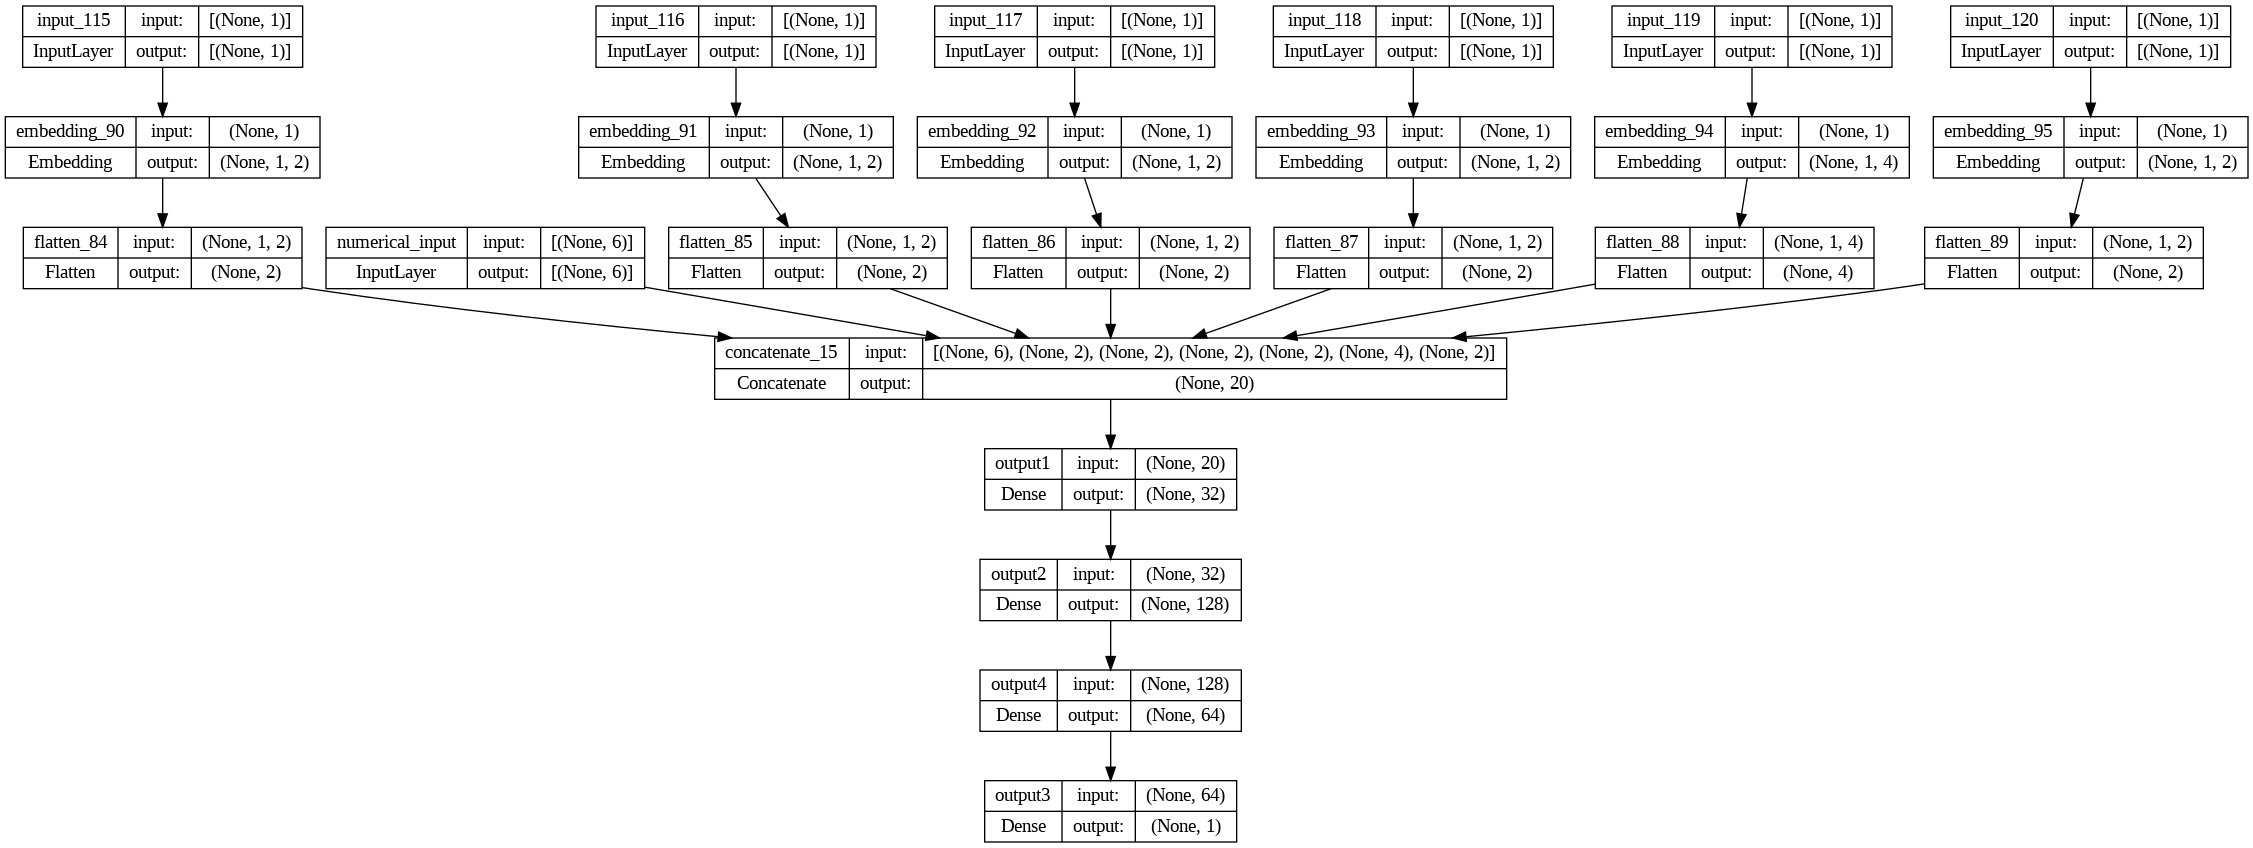

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

# Tokenization2

In [ ]:
embedding_input_dims = {}

for cat in categorical_features:
  embedding_input_dims[cat] = len(label_encoders[cat].classes_)

print(embedding_input_dims)

{'HomePlanet': 4, 'CryoSleep': 3, 'Destination': 4, 'VIP': 3, 'Deck': 9, 'Side': 3}


In [ ]:


num_input = Input(shape=(6,), name='numerical_input')

embeddings_input = {}
for cat in categorical_features:
  embeddings_input[cat] = Input(1,)

embeddings_input

{'HomePlanet': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_145')>,
 'CryoSleep': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_146')>,
 'Destination': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_147')>,
 'VIP': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_148')>,
 'Deck': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_149')>,
 'Side': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_150')>}

In [ ]:
embeddings_layers = {}
for cat in categorical_features:
  embeddings_layers[cat] =  Embedding(input_dim=embedding_input_dims[cat], output_dim=4)(embeddings_input[cat])

embeddings_layers

{'HomePlanet': <KerasTensor: shape=(None, 1, 4) dtype=float32 (created by layer 'embedding_120')>,
 'CryoSleep': <KerasTensor: shape=(None, 1, 4) dtype=float32 (created by layer 'embedding_121')>,
 'Destination': <KerasTensor: shape=(None, 1, 4) dtype=float32 (created by layer 'embedding_122')>,
 'VIP': <KerasTensor: shape=(None, 1, 4) dtype=float32 (created by layer 'embedding_123')>,
 'Deck': <KerasTensor: shape=(None, 1, 4) dtype=float32 (created by layer 'embedding_124')>,
 'Side': <KerasTensor: shape=(None, 1, 4) dtype=float32 (created by layer 'embedding_125')>}

In [ ]:
flattened_embeddings = {}
for cat in categorical_features:
  flattened_embeddings[cat] = Flatten()(embeddings_layers[cat])

flattened_embeddings

{'HomePlanet': <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'flatten_114')>,
 'CryoSleep': <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'flatten_115')>,
 'Destination': <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'flatten_116')>,
 'VIP': <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'flatten_117')>,
 'Deck': <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'flatten_118')>,
 'Side': <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'flatten_119')>}

In [ ]:

merged = num_input
for emb in flattened_embeddings:
  print(merged)
  merged = Concatenate()([merged, flattened_embeddings[emb]])


merged

KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name='numerical_input'), name='numerical_input', description="created by layer 'numerical_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='concatenate_20/concat:0', description="created by layer 'concatenate_20'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14), dtype=tf.float32, name=None), name='concatenate_21/concat:0', description="created by layer 'concatenate_21'")
KerasTensor(type_spec=TensorSpec(shape=(None, 18), dtype=tf.float32, name=None), name='concatenate_22/concat:0', description="created by layer 'concatenate_22'")
KerasTensor(type_spec=TensorSpec(shape=(None, 22), dtype=tf.float32, name=None), name='concatenate_23/concat:0', description="created by layer 'concatenate_23'")
KerasTensor(type_spec=TensorSpec(shape=(None, 26), dtype=tf.float32, name=None), name='concatenate_24/concat:0', description="created by layer 'concatenate_24'")


<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'concatenate_25')>

In [ ]:
output = Dense(64, activation='relu', name='output1')(merged)
output = Dense(64, activation='relu', name='output2')(output)
output = Dense(1, activation='sigmoid', name='output3')(output)

model = Model(inputs=[num_input , embeddings_input['HomePlanet'],embeddings_input['CryoSleep'],embeddings_input['Destination'],embeddings_input['VIP'],embeddings_input['Deck'],embeddings_input['Side']], outputs=output)



In [ ]:
inputs

[<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'numerical_input')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'input_2')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'input_3')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'input_4')>,
 <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'input_5')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'input_6')>]

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


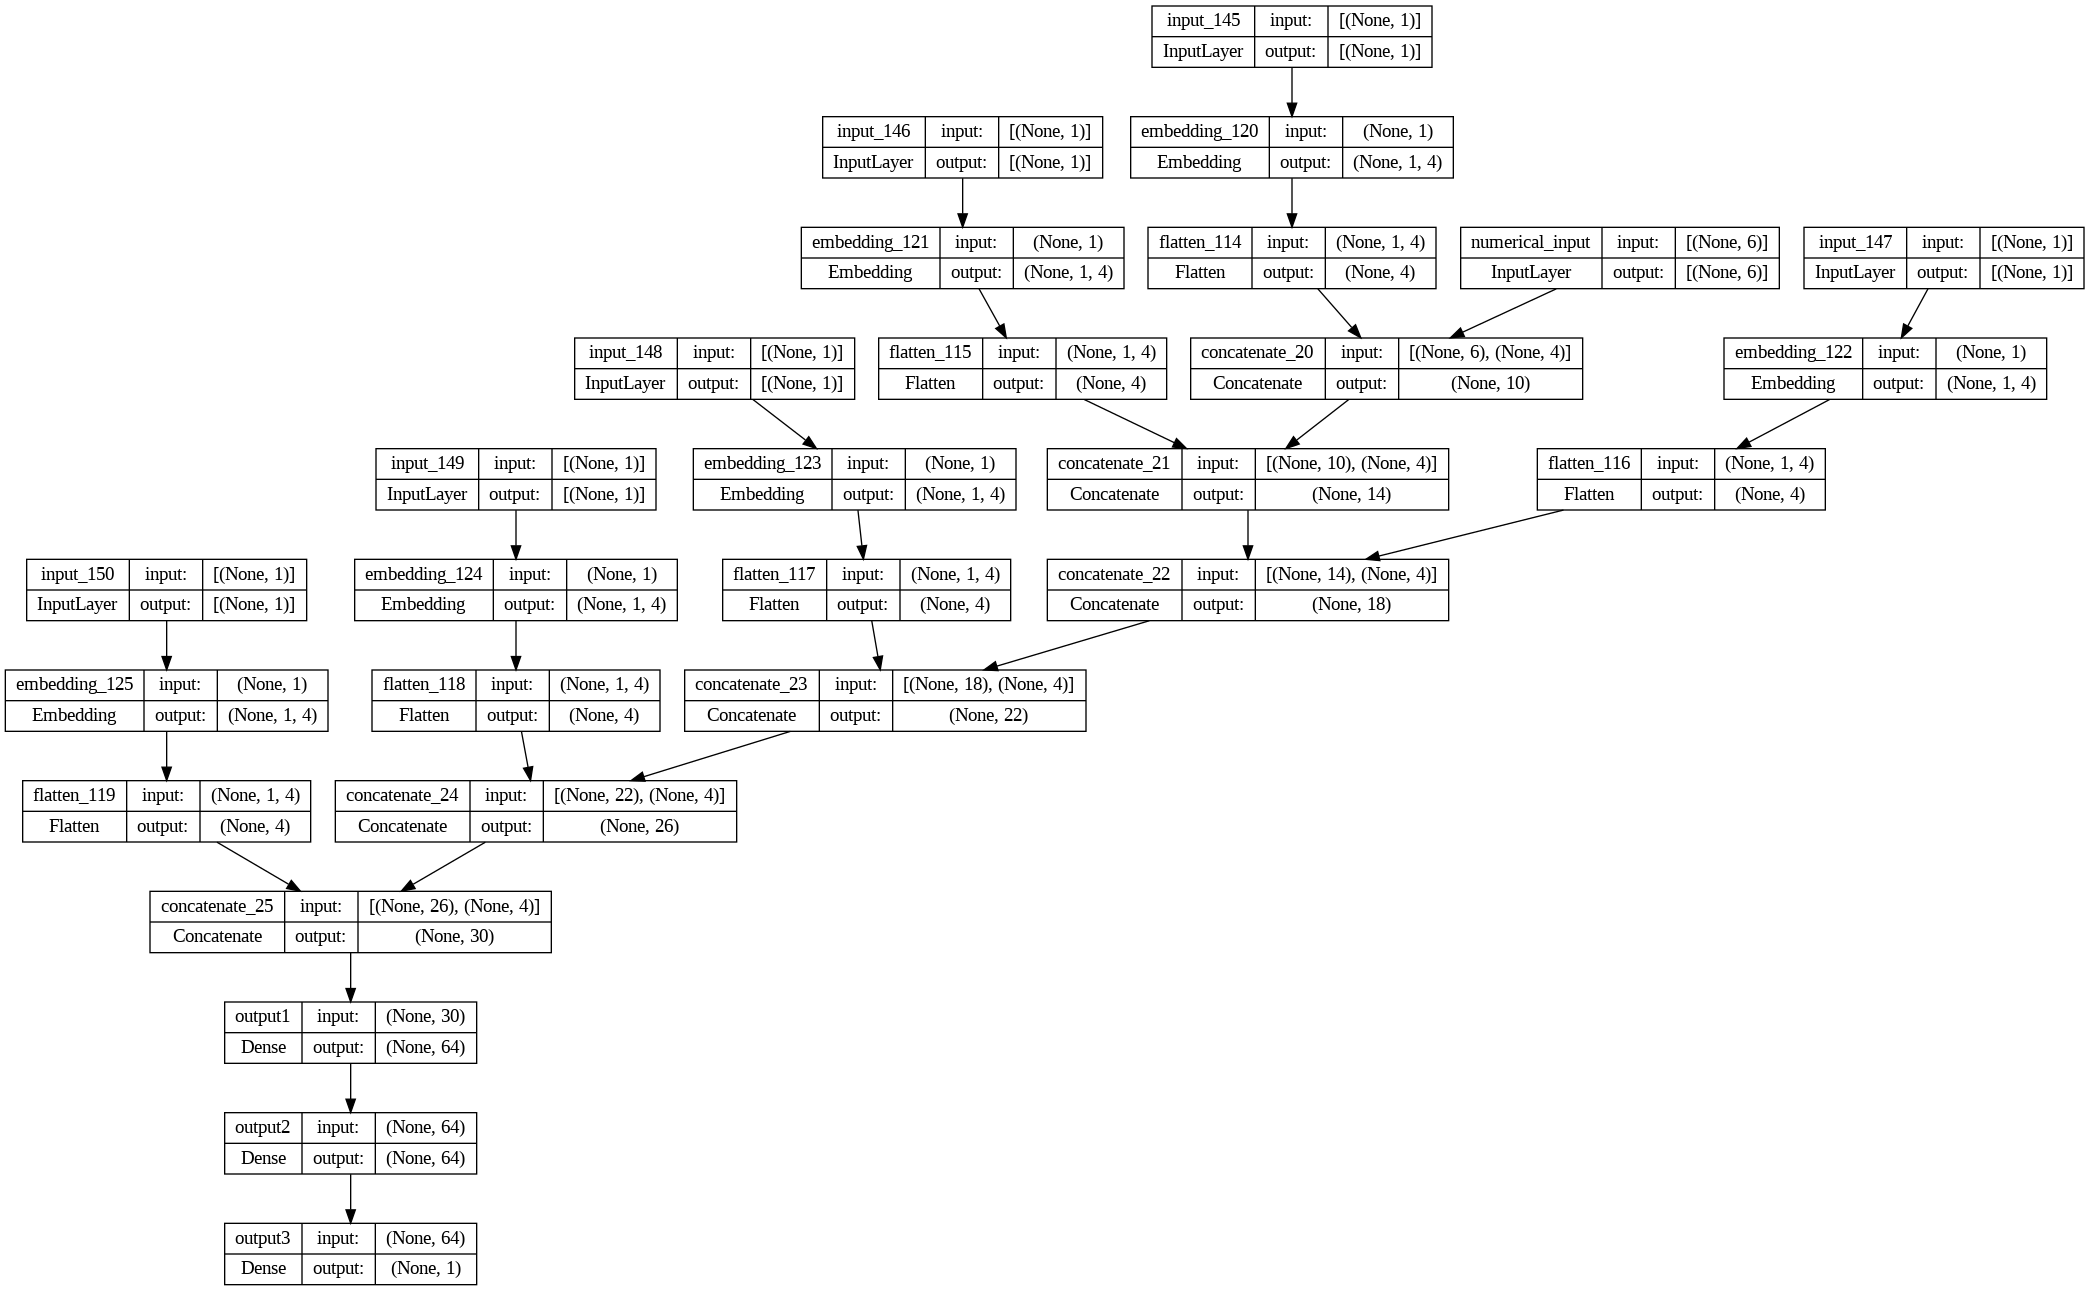

In [ ]:

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
y_train = y_train.to_numpy()






AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
print(y_train[:5])

[0 0 1 1 1]


In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [ ]:
X_train_num = X_train[numerical_features]
X_train_cat = X_train[categorical_features]

X_train_cat.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
2333,0,0,2,0,8,2
2589,0,0,2,0,5,0
8302,1,1,0,0,2,1
8177,2,0,2,0,5,0
500,1,1,0,0,2,0


In [ ]:
model.fit([X_train_num, X_train_cat['HomePlanet'],X_train_cat['CryoSleep'],X_train_cat['Destination'],X_train_cat['VIP'],X_train_cat['Deck'],X_train_cat['Side'] ], y_train, epochs=10, batch_size=32)

Epoch 1/10
218/218 [==============================] - 4s 5ms/step - loss: 5.8881 - accuracy: 0.7239
Epoch 2/10
218/218 [==============================] - 1s 5ms/step - loss: 3.4836 - accuracy: 0.7483
Epoch 3/10
218/218 [==============================] - 1s 5ms/step - loss: 2.4805 - accuracy: 0.7537
Epoch 4/10
218/218 [==============================] - 1s 3ms/step - loss: 1.8934 - accuracy: 0.7529
Epoch 5/10
218/218 [==============================] - 1s 3ms/step - loss: 1.6447 - accuracy: 0.7573
Epoch 6/10
218/218 [==============================] - 1s 3ms/step - loss: 1.8958 - accuracy: 0.7643
Epoch 7/10
218/218 [==============================] - 1s 3ms/step - loss: 1.7249 - accuracy: 0.7590
Epoch 8/10
218/218 [==============================] - 1s 3ms/step - loss: 1.6777 - accuracy: 0.7588
Epoch 9/10
218/218 [==============================] - 1s 3ms/step - loss: 1.6094 - accuracy: 0.7573
Epoch 10/10
218/218 [==============================] - 1s 3ms/step - loss: 1.2772 - accuracy: 0.7637